#### Используя PyTorch:

1. Создать и обучить регрессионную модель, которая аппроксимирует значение функции sin(x + 2*y)exp(-(2x + y)^2) на диапазоне значений [-10;10] по х и у.
2. В качестве обучающей выборки необходимо сгенерировать 20000 точек случайным образом.
3. Разделить получившийся датасет на train / test / val в отношениях 70% / 15% / 15%, соответственно.

Результаты:
- Посчитать метрику Mean Square Error(MSE) на test.
- Нарисовать график, в котором сравнивается истинная функция и ее аппроксимированный вариант (предсказываемый моделью).

Useful links:
- https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/
- https://www.geeksforgeeks.org/plotting-sine-and-cosine-graph-using-matloplib-in-python/
- https://www.tutorialspoint.com/plotting-random-points-under-sine-curve-in-python-matplotlib
- https://www.youtube.com/watch?v=RSjB5kNHKXc Neural Network for sin(x) regression
- https://towardsdatascience.com/deep-learning-vs-linear-regression-ea74aca115ea Linear Regression vs Neural Network

In [1]:
import numpy as np
# from pylab import cm
import torch

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.rcParams['figure.figsize'] = (14.0, 7.0)

In [2]:
start_point = -10
end_point = 10
num_points = 10000

$z = sin(x+2y) \cdot e^{-(2x+y)^2}$

In [3]:
def f_np(x,y):
    return np.sin(x + 2*y)*np.exp(-(2*x + y)**2)

In [4]:
def f(x,y):
    return torch.sin(x + 2*y)*torch.exp(-(2*x + y)**2)

In [5]:
x = np.linspace(start=start_point, stop=end_point, num=num_points)
y = np.linspace(start=start_point, stop=end_point, num=num_points)

In [6]:
x.shape, y.shape

((10000,), (10000,))

In [7]:
z = f_np(x,y)

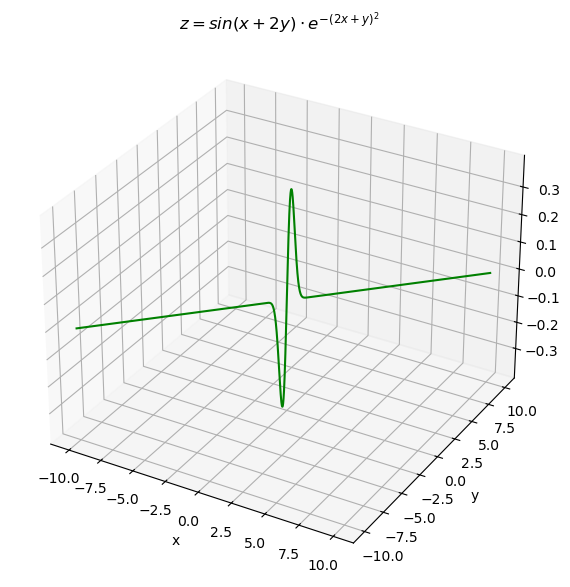

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('$z = sin(x+2y) \cdot e^{-(2x+y)^2}$')
plotline = ax.plot3D(x, y, z, c='Green');

## Train Dataset

In [9]:
x1 = np.random.uniform(size=num_points)  ## generating num_points random values from [0,1) interval for the first argument
x2 = x1  ## for our 3D function the first argument is basically equivalent to the second one

In [10]:
X_train_np = np.array([x1,x2]).T

In [11]:
X_train_np.shape

(10000, 2)

In [12]:
(end_point-start_point)/2

10.0

In [13]:
# X_train_np = X_train_np * 20.0 - 10.0 ## redistributing random values to fill [-10, 10] interval 
## redistributing random values to fill [start_point, end_point] interval 
X_train_np = X_train_np * (end_point-start_point) - (end_point-start_point)/2 

In [14]:
X_train = torch.from_numpy(X_train_np)  ## Creating a tensor from numpy array
y_train = f(X_train[:,0],X_train[:,1]) ## Calculating values of our function

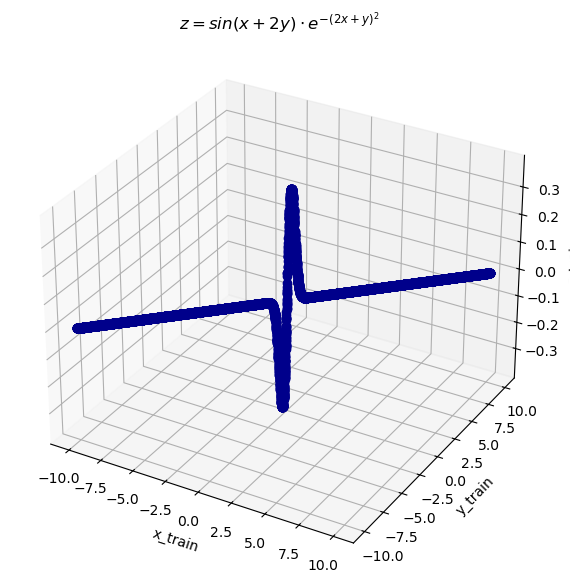

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x_train')
ax.set_ylabel('y_train')
ax.set_zlabel('z_train')
ax.set_title('$z = sin(x+2y) \cdot e^{-(2x+y)^2}$')
plotline = ax.plot3D(X_train[:,0].numpy(), X_train[:,1].numpy(), y_train.numpy(), 'o', c='darkblue');

In [16]:
y_train.shape

torch.Size([10000])

In [17]:
noise = torch.randn(y_train.shape) / 40.

In [18]:
noise.shape

torch.Size([10000])

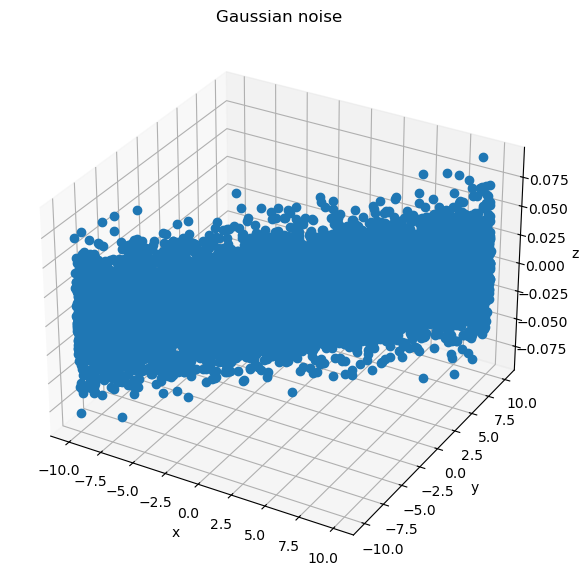

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Gaussian noise')
plotline = ax.plot3D(X_train[:,0].numpy(), X_train[:,1].numpy(), noise.numpy(), 'o');

In [20]:
y_train = y_train + noise

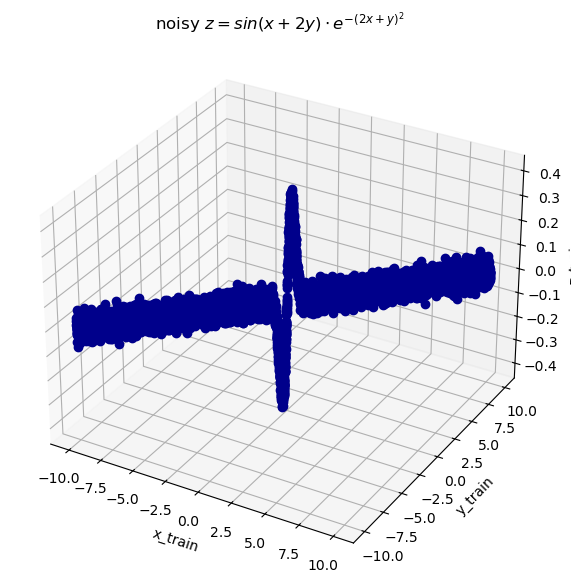

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x_train')
ax.set_ylabel('y_train')
ax.set_zlabel('z_train')
ax.set_title('noisy $z = sin(x+2y) \cdot e^{-(2x+y)^2}$')
plotline = ax.plot3D(X_train[:,0].numpy(), X_train[:,1].numpy(), y_train.numpy(), 'o', c='darkblue');

In [22]:
X_train.shape, y_train.shape

(torch.Size([10000, 2]), torch.Size([10000]))

In [23]:
X_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [24]:
X_train.shape, y_train.shape

(torch.Size([10000, 1, 2]), torch.Size([10000, 1]))

## Validation Dataset

In [25]:
num_points*0.15

1500.0

In [26]:
x1_val = np.linspace(start=start_point, stop=end_point, num=int(num_points*0.15))
x2_val = np.linspace(start=start_point, stop=end_point, num=int(num_points*0.15))

In [27]:
X_val_np = np.array([x1_val,x2_val]).T

In [28]:
X_val = torch.from_numpy(X_val_np)  ## Creating a tensor from numpy array
y_val = f(X_val[:,0],X_val[:,1]) ## Calculating values of our function

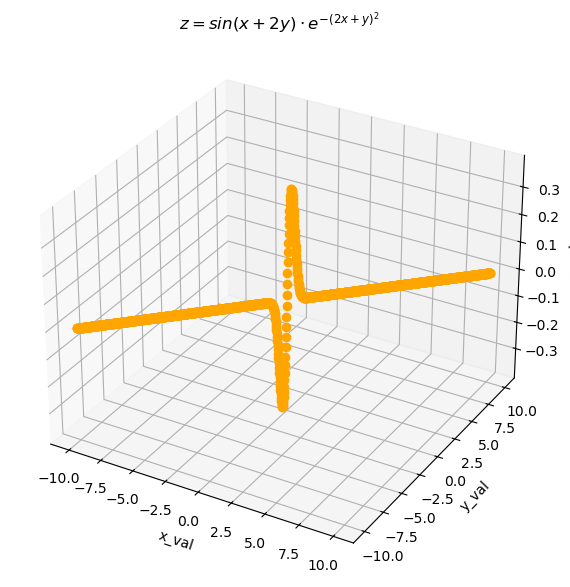

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x_val')
ax.set_ylabel('y_val')
ax.set_zlabel('z_val')
ax.set_title('$z = sin(x+2y) \cdot e^{-(2x+y)^2}$')
plotline = ax.plot3D(X_val[:,0].numpy(), X_val[:,1].numpy(), y_val.numpy(), 'o', c='orange');

In [30]:
type(X_val), type(y_val)

(torch.Tensor, torch.Tensor)

In [31]:
X_val.shape, y_val.shape

(torch.Size([1500, 2]), torch.Size([1500]))

In [32]:
#X_val.unsqueeze_(1)
#y_val.unsqueeze_(1);

In [33]:
X_val.shape, y_val.shape

(torch.Size([1500, 2]), torch.Size([1500]))

## Model construction

In [34]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(10)

## Prediction

In [35]:
def predict_3d(net, X, y):
    pred = net.forward(X.float())
    return pred.squeeze_(1,2)

In [36]:
y_pred = predict_3d(sine_net, X_val.unsqueeze(1), y_val.unsqueeze(1))

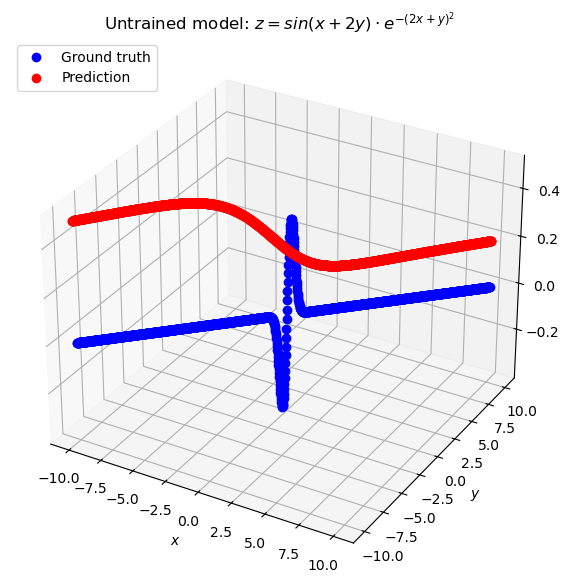

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Untrained model: $z = sin(x+2y) \cdot e^{-(2x+y)^2}$')
ax.plot3D(X_val[:,0].numpy(), X_val[:,1].numpy(), y_val.numpy(), 'o', c='blue', label='Ground truth');
# ax.plot3D(X_val[:,0].numpy(), X_val[:,1].numpy(), y_pred.detach().numpy(), 'o', c='red', label='Prediction', );
ax.plot3D(X_val[:,0].numpy(), X_val[:,1].numpy(), y_pred.data.numpy(), 'o', c='red', label='Prediction', );
plt.legend(loc='upper left');

## Optimizer

In [38]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

## Loss function

In [39]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

## Training procedure

In [40]:
val_loss_list = list()
loss_prev = 1
threshold = 0.00001

for epoch_index in range(200):
    optimizer.zero_grad()

    y_pred = sine_net.forward(X_train.float())
    loss_val = loss(y_pred, y_train)

    # if epoch_index % 100 == 99:
    val_loss_list.append(loss_val.item())
    #    print(f'iter={epoch_index}, loss={loss_val.item()}')    

    if abs(loss_prev - loss_val.item()) <= threshold:
        break
    else:
        loss_prev = loss_val.item()
            
    loss_val.backward()

    optimizer.step()

#predict(sine_net, x_validation, y_validation)

## Plotting loss

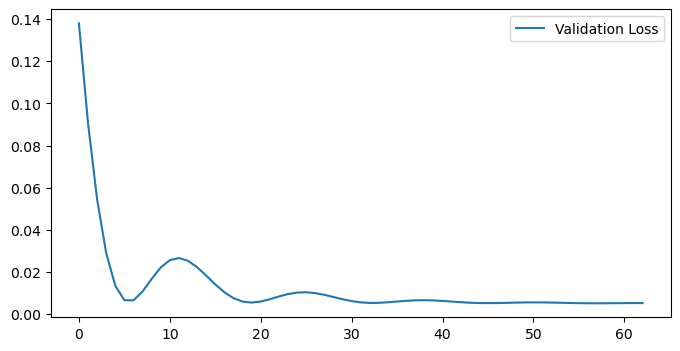

In [41]:
plt.figure(figsize=(8,4))
val_plot = plt.plot(val_loss_list, label="Validation Loss")
plt.legend(loc="upper right");

In [42]:
y_pred = predict_3d(sine_net, X_val.unsqueeze(1), y_val.unsqueeze(1))

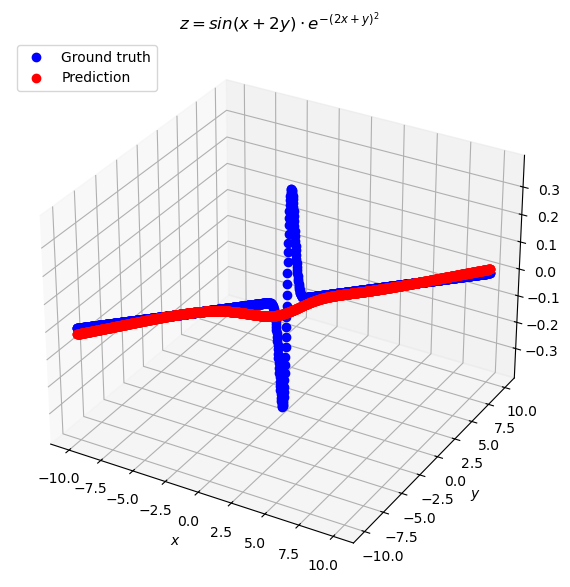

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('$z = sin(x+2y) \cdot e^{-(2x+y)^2}$')
ax.plot3D(X_val[:,0].numpy(), X_val[:,1].numpy(), y_val.numpy(), 'o', c='blue', label='Ground truth');
#ax.plot3D(X_val[:,0].numpy(), X_val[:,1].numpy(), y_pred.detach().numpy(), 'o', c='red', label='Prediction', );
ax.plot3D(X_val[:,0].numpy(), X_val[:,1].numpy(), y_pred.data.numpy(), 'o', c='red', label='Prediction', );
plt.legend(loc='upper left');

In [44]:
loss_val.item()

0.005218629908587741